# Overfitting and underfitting

## Importing the libraries and data
Import the `numpy`, `matplotlib` and `scikit-learn` libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Now we create a ["moons" dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), composed by two interleaving half circles, one for each class, with 2 dimensions (features) and 200 samples:

In [2]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=0) # random_state=0 set the random seed to 0 and ensures replicability 

# Splitting into training and test sets

Split the moons dataset into training and test sets, using the function [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [3]:
# TO BE COMPLETED

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.5, random_state=0)

Make a scatter plot of the training and the test samples:

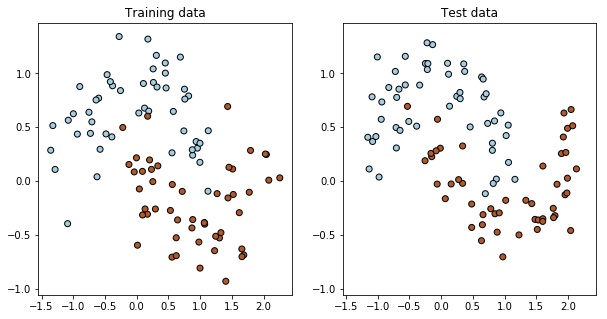

In [4]:
plt.figure(figsize=(10, 5))
cmap = plt.set_cmap(plt.cm.Paired)

# first subplot
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
ax1.set_title("Training data")

# second subplot
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
ax2.set_title("Test data")

plt.show()

## Train the SVM with increasing model complexity

In this case we choose to adopt the [Support Vector Machine](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with the Radial Basis Function (RBF) kernel. SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. We won't go into these in detail.

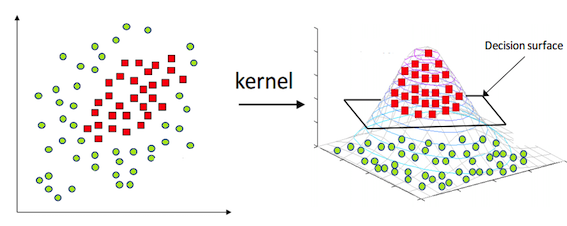

Train the model on the training set and predict on the test set at different values of the kernel's $\gamma$ parameter. The complexity of the model increases as the gamma parameter increases. In this case we keep the SVM penalty term ($C$) fixed to 1.

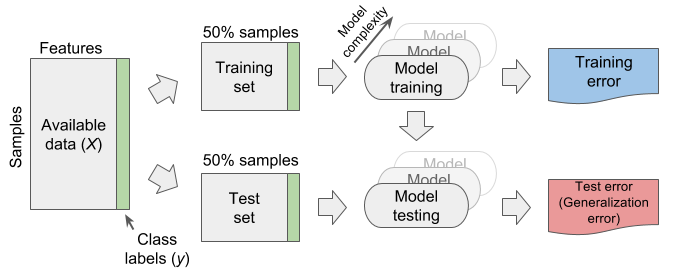

In [5]:
# TO BE COMPLETED

# inizialize the training and test error lists
err_train, err_test = [], []

# from 10^-1 to 10^3, 50 steps in logaritmic scale
gammas = np.logspace(-1, 3, 50) 

# for each value of gamma:
for gamma in gammas:
    
    clf = SVC(kernel='rbf', gamma=gamma, C=1) # create a classifier instance with the current value of gamma   
    clf.fit(X_train, y_train) # train the model on the training data
        
    y_train_pred = clf.predict(X_train) # predict the samples in the training set
    y_test_pred = clf.predict(X_test) # predict the samples in the test set
    
    # compute the errors as 1-accuracy
    err_train.append(1-metrics.accuracy_score(y_train_pred, y_train))
    err_test.append(1-metrics.accuracy_score(y_test_pred, y_test))

Now we can plot the training and test error curves:

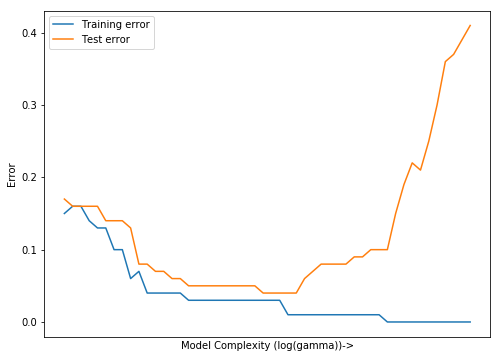

In [6]:
# TO BE COMPLETED

plt.figure(figsize=(8, 6))
plt.plot(np.log(gammas), err_train, label="Training error")
plt.plot(np.log(gammas), err_test, label="Test error")
plt.xlabel("Model Complexity (log(gamma))->")
plt.ylabel("Error")
plt.xticks([])
plt.legend()
plt.show()

In [7]:
# TO BE COMPLETED

idx_min_err_test = np.argmin(err_test)
gamma_min_err_test = gammas[idx_min_err_test]
print("Best gamma: {:.2f}".format(gamma_min_err_test))

Best gamma: 9.10


## Plot the decision regions

Plot the decision regions of the simplest, best and most complex models.

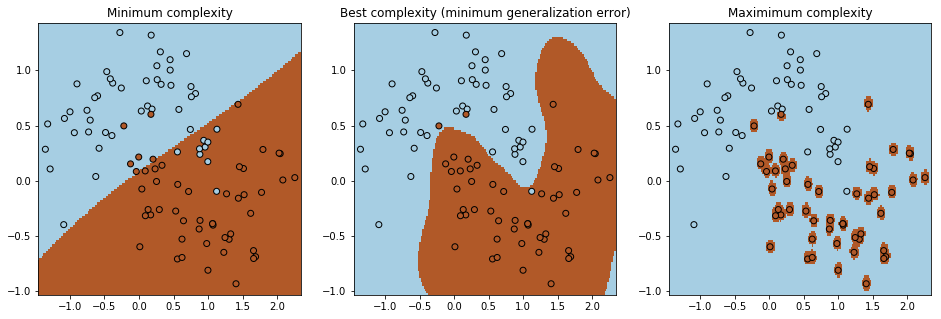

In [8]:
# create a dense grid of points to predict in the same domain of the training data
f0_min, f0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
f1_min, f1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
f0_new, f1_new = np.meshgrid(np.arange(f0_min, f0_max, 0.02), np.arange(f1_min, f1_max, 0.02))
X_new = np.c_[f0_new.ravel(), f1_new.ravel()]

# initialize the tree classifiers
clf_min_complexity = SVC(kernel='rbf', gamma=1e-1, C=1) # simplest model
clf_best_complexity = SVC(kernel='rbf', gamma=gamma_min_err_test, C=1) # best model
clf_max_complexity = SVC(kernel='rbf', gamma=1e3, C=1) # most complex model

# train the models on the training data
clf_min_complexity.fit(X_train, y_train)
clf_best_complexity.fit(X_train, y_train)
clf_max_complexity.fit(X_train, y_train)

# predict the class on the new points
y_min_complexity = clf_min_complexity.predict(X_new)
y_best_complexity = clf_best_complexity.predict(X_new)
y_max_complexity = clf_max_complexity.predict(X_new)


# plot the decision regions for each model
fig = plt.figure(figsize=(16, 5))
cmap = plt.set_cmap(plt.cm.Paired)
ax1 = plt.subplot(1, 3, 1)
ax1.pcolormesh(f0_new, f1_new, y_min_complexity.reshape(f0_new.shape))
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
ax1.set_title("Minimum complexity")
ax2 = plt.subplot(1, 3, 2)
ax2.pcolormesh(f0_new, f1_new, y_best_complexity.reshape(f0_new.shape))
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
ax2.set_title("Best complexity (minimum generalization error)")
ax3 = plt.subplot(1, 3, 3)
ax3.pcolormesh(f0_new, f1_new, y_max_complexity.reshape(f0_new.shape))
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
ax3.set_title("Maximimum complexity")
plt.show()